In [363]:
! pip install dataprep --quiet

In [364]:
import pandas as pd
from sklearn.ensemble import *
from sklearn.tree import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import *
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.naive_bayes import *
from sklearn.svm import *
from sklearn.neighbors import *
from sklearn.tree import *
from sklearn.metrics import *
from sklearn.decomposition import PCA
from pandas_profiling import ProfileReport
import time
%matplotlib inline

# Getting the data from source

In [365]:
data = pd.read_csv("https://raw.githubusercontent.com/AIP-BITS/BITS-DATA/main/cancer.csv")
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [366]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Data does not seem to be normalized hence would require to perform normalization and standardization

In [367]:
data.shape

(569, 31)

As we need to classify the target variable I'll check the number the values of target variable which are 1s and which are 0s and could training for accuracy give better results or should we be instead training for precision recall.

In [368]:
data['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

In [369]:
data['target'].value_counts(normalize = True)

1.0    0.627417
0.0    0.372583
Name: target, dtype: float64

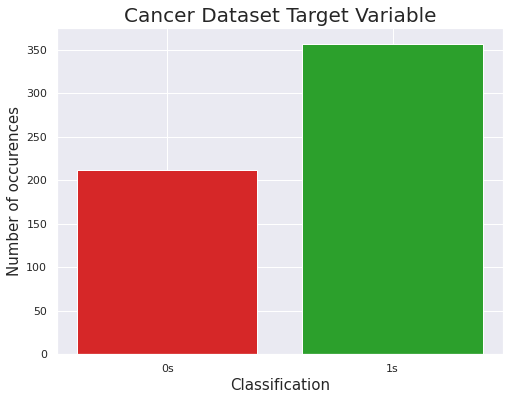

In [370]:
#Counting the column values in target column
get_count_0 = 0
get_count_1 = 0
for i in data.target :
    if i == 0:
        get_count_0 += 1
    elif i == 1:
        get_count_1 += 1
plt.figure(figsize = (8,6))
plt.bar(x = ['0s','1s'],height = [get_count_0, get_count_1],color = ['tab:red','tab:green'])
plt.title('Cancer Dataset Target Variable',fontsize = 20)
plt.xlabel('Classification', size = 15)
plt.ylabel('Number of occurences', size =15)
plt.show()

*Although less in number, the number of 0s are not significantly less compared to 1s, hence test of accuracy is not completely useless and cannot be outruled*

# Null Values/Outlier Treatment 

In [371]:
data.dropna()
print(data.shape)

(569, 31)


*Checking for missing values we drop the values from the dataset and we can see the dimension of the dataset remained the same hence we can assume the data has no missing or null values*

In [372]:
print(data.isna().sum().sum())

0


**No null values were detected in the dataset**

In [373]:
#checking for duplicates 
data.duplicated().sum()

0

**No duplicate values were detected in the dataset**

*Checking for outliers, we are going to use Z score method to classify and in case there are too many outliers, decide with an approach to treat them so that out models do not get affected*

In [374]:
outliers_percentage = []
data_select = data
for i in data_select:
    count = 0
    for j in data_select[i]:
        column_mean = np.mean(data_select[i])
        column_std = np.std(data_select[i])
        threshold = 3
        z_value = abs(j-column_mean)/column_std
        if(z_value>threshold):
            count+=1
    outliers_percentage.append(count/len(data_select[i]))

In [375]:
print(outliers_percentage)

[0.008787346221441126, 0.007029876977152899, 0.012302284710017574, 0.014059753954305799, 0.008787346221441126, 0.015817223198594025, 0.015817223198594025, 0.01054481546572935, 0.008787346221441126, 0.012302284710017574, 0.012302284710017574, 0.015817223198594025, 0.014059753954305799, 0.01054481546572935, 0.012302284710017574, 0.0210896309314587, 0.01054481546572935, 0.01054481546572935, 0.019332161687170474, 0.01757469244288225, 0.01054481546572935, 0.007029876977152899, 0.01054481546572935, 0.01757469244288225, 0.005272407732864675, 0.01757469244288225, 0.012302284710017574, 0.0, 0.015817223198594025, 0.015817223198594025, 0.0]


As the number of outliers for all the columns are less than 2%, it is safe to assume that they won't affect our training and testing hence no particular action is required in this case.

Plotting the correlation heatmap for the features

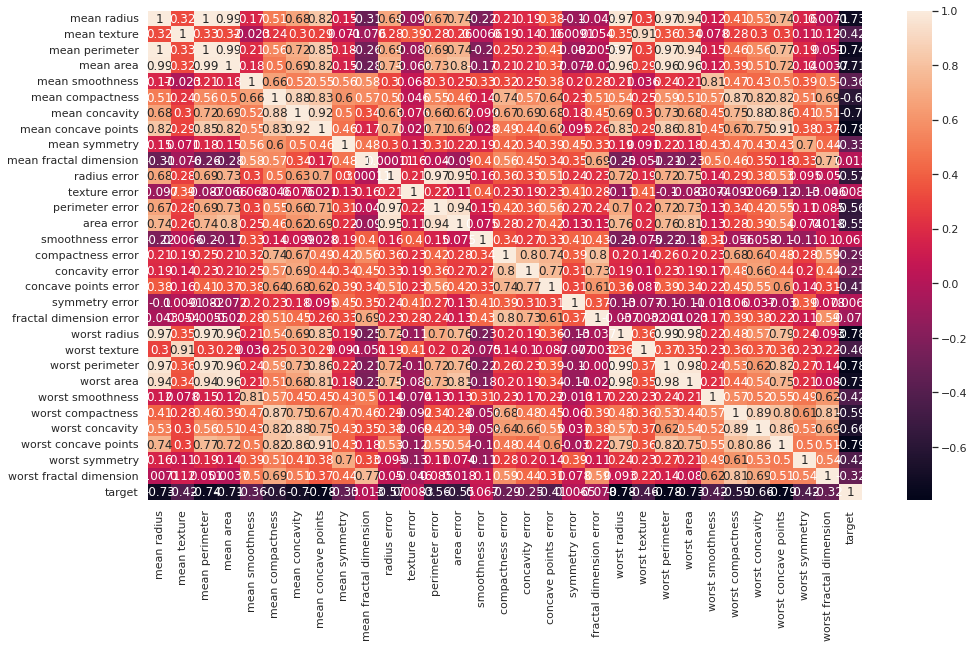

In [376]:
correlation_feat = data.corr()
sns.set(rc = {"figure.figsize":(16,9)})
sns.heatmap(correlation_feat, annot = True)

Some correlation is observed between features such as mean radius and mean area however a particular trend through which the correlation can be generalized was not observed. So we further look at plots of data stacked together to see if we can make any suitable observations out of it.

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


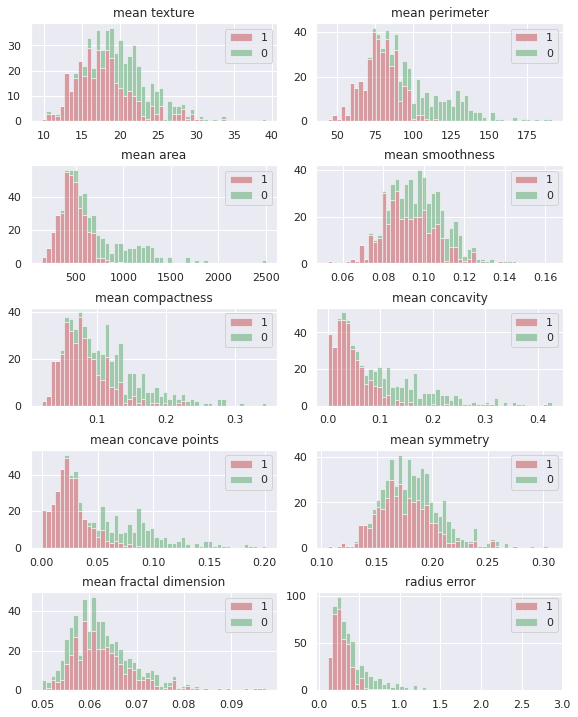

In [377]:
features_mean=list(data.columns[1:11])
# split dataframe into two based on diagnosis
df_1=data[data['target'] ==1]
df_0=data[data['target'] ==0]

#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[features_mean[idx]]) - min(data[features_mean[idx]]))/50
    ax.hist([df_1[features_mean[idx]],df_0[features_mean[idx]]], bins=np.arange(min(data[features_mean[idx]]), max(data[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, label=['1','0'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

*We checked the dataset by stacking the data grouped by their target classification however generalizing any particular trend just by vidualizing the data seems far fetched hence we move on to further analysis*

We perform auto eda using dataprep just to check if we missed something in the dataset

In [378]:
from dataprep.eda import plot
from dataprep.eda import create_report
report = create_report(data)
report.save('/content/drive/MyDrive/Sem 4-1/BITS F464/ML_Assignment_2/cancer_data.html')

Report has been saved to /content/drive/MyDrive/Sem 4-1/BITS F464/ML_Assignment_2/cancer_data.html!


Observations
1. No null values/duplicated values were detected
2. mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.
3. mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other. In any of the histograms there are no noticeable large outliers that warrants further cleanup.

In [379]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


# Splitting Predictor and Target Variable

In [380]:
X,y = data.iloc[:,:-1], data.iloc[:,-1]

In [381]:
X.shape

(569, 30)

In [382]:
y.shape

(569,)

In [383]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

**Standardizing the dataset**

In [384]:
X = (X - np.mean(X))/ np.std(X)
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


As we have done the basic preprocessing we train the model on a KNN classifier and check the result.

# Splitting the Training and Testing Dataset

In [385]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 21)

# KNN classifier

In [386]:
# List to store model time, accuracy and f1_score
knn_model_time = []
knn_model_acc = []
knn_model_f1_score = []
knn_model_pre = []
knn_model_rec = []

In [387]:
#Training the K Neighbors Classifier using default parameters
start = time.time()
knn_model = KNeighborsClassifier(n_neighbors = 6)
knn_model.fit(X_train , y_train)
y_pred_knn = knn_model.predict(X_test)
run_time = time.time()-start

knn_model_time.append(run_time)
print(run_time, 'seconds')

0.020600318908691406 seconds


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [388]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95        64
         1.0       0.95      0.99      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



A 96% accuracy with a 97% precision and 96% recall was achieved however, we can tweak the parameters and maybe the KNN could perform better, but for now we would consider this model as our baseline model and result.

**We save the corresponding values of f1-score and accuracy for revisiting later**

In [389]:
knn_model_acc.append(accuracy_score(y_test,y_pred_knn))
knn_model_f1_score.append(f1_score(y_test,y_pred_knn))
knn_model_pre.append(precision_score(y_test,y_pred_knn))
knn_model_rec.append(recall_score(y_test,y_pred_knn))

# Logistic Regression

In [390]:
# Logistic Regression model time, model accuracy, f1_score, precision, recall 
lr_model_time = []
lr_model_acc = []
lr_model_f1_score = []
lr_model_pre = []
lr_model_rec = []

In [391]:
start = time.time()
lr_model = LogisticRegression(max_iter = 10000)
lr_model.fit(X_train,y_train)
y_pred_lr = lr_model.predict(X_test)
run_time = time.time()-start

lr_model_time.append(run_time)
print(run_time,'seconds')

0.029331445693969727 seconds


In [392]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        64
         1.0       0.96      1.00      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



So logistic regression clearly performed better than KNN Classifier
As of now we have tested two classifier, and logistic regression will be selected as the baseline for further classification models as the accuracy is 98% while the 98% f1-score as well with practically the same computation time as KNN Classifier.

In [393]:
lr_model_acc.append(accuracy_score(y_test,y_pred_lr))
lr_model_f1_score.append(f1_score(y_test,y_pred_lr))
lr_model_pre.append(precision_score(y_test,y_pred_lr))
lr_model_rec.append(recall_score(y_test,y_pred_lr))

**Plotting the graph of default classifier used**


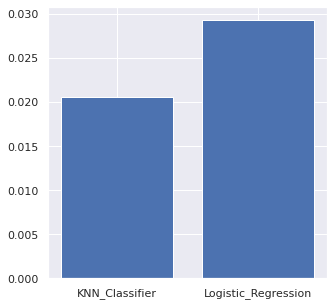

In [394]:
plt.figure(figsize = (5,5))
plt.bar(x = ['KNN_Classifier', 'Logistic_Regression'],height = [knn_model_time[0],lr_model_time[0]])
plt.show()

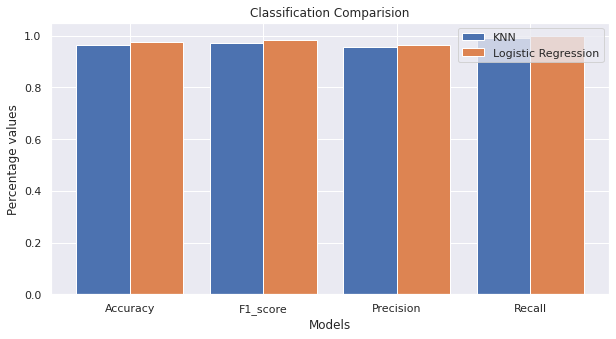

In [395]:
X_labels = ['Accuracy','F1_score', 'Precision','Recall']
X_axis = np.arange(len(X_labels))

plt.figure(figsize =(10,5))
plt.bar(X_axis - 0.2, [knn_model_acc[0],knn_model_f1_score[0],knn_model_pre[0],knn_model_rec[0]], 0.4, label = 'KNN')
plt.bar(X_axis + 0.2, [lr_model_acc[0],lr_model_f1_score[0],lr_model_pre[0],lr_model_rec[0]], 0.4, label = 'Logistic Regression')
  
plt.xticks(X_axis, X_labels)
plt.xlabel("Models")
plt.ylabel("Percentage values")
plt.title("Classification Comparision")
plt.legend()
plt.show()

*As clearly visible from the results that Logistic Regression has slightly better classification scores while having lower computation time hence we would consider LR to be our baseline model throughout this notebook*

# Decision Tree Classifier




In [396]:
# List to store model time for Decision Tree Classifier
dtc_model_time = []
model_acc = []
model_f1_score = []
model_pre = []
model_rec = []

In [397]:
start = time.time()
dtc_model = DecisionTreeClassifier()
dtc_model = dtc_model.fit(X_train,y_train)
y_pred_dtc_0 = dtc_model.predict(X_test)
run_time = time.time()-start

dtc_model_time.append(run_time)
print(run_time, 'seconds')

0.012937784194946289 seconds


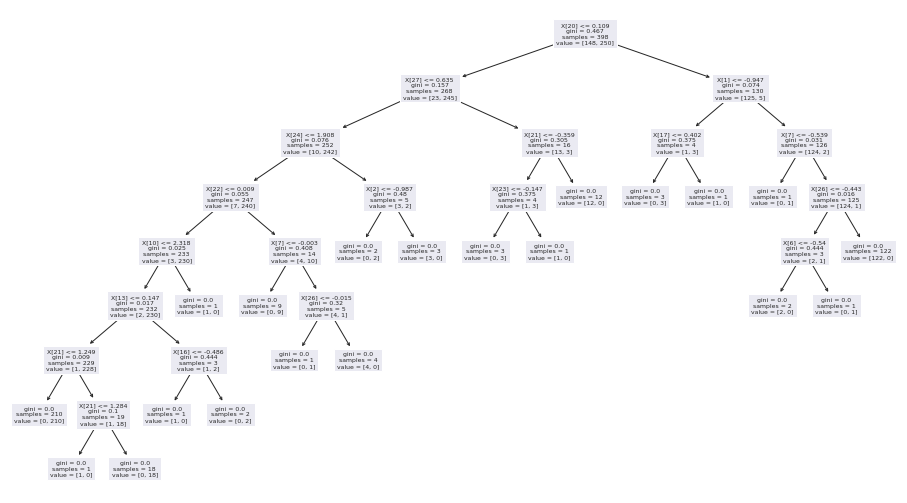

In [398]:
plot_tree(dtc_model)
plt.show()

*Although the tree was able to achieve pure leaves at a relatively lower computation time, their might be overfit of the data in this case or we maybe able to achieve a working model at a lower depth*

In [399]:
print(classification_report(y_test,y_pred_dtc_0))

              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88        64
         1.0       0.92      0.94      0.93       107

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.91       171
weighted avg       0.91      0.91      0.91       171



We trained the Decision Tree on the given data, however we haven't normalized the data yet but still a 91% accuracy was achieved and computation time was also slightly reduced compared to KNN, or logistic regression. However the precision recall values are relatively much lower, hence maybe the data is overfitting and we will try to tune the hyperparameters of the model and use grid search further in the decision trees.

In [400]:
model_acc.append(accuracy_score(y_test,y_pred_dtc_0))
model_f1_score.append(f1_score(y_test,y_pred_dtc_0))
model_pre.append(precision_score(y_test,y_pred_dtc_0))
model_rec.append(recall_score(y_test,y_pred_dtc_0))

In [401]:
X.shape

(569, 30)

**Applying PCA on the given dataset to reduce the load on the model and hence try and control overfit**

In [402]:
pca = PCA(n_components = 15)
X_red = pca.fit_transform(X)

*We define a new variable X_red which implies X reduced as the features of 30 columns are being explained in 4 columns*

In [403]:
X.shape

(569, 30)

In [404]:
X_red.shape

(569, 15)

*We reduced the number of features from 30 to 20 and based on this we would see if we can reduce the computation time and observe some better results for our decision tree model*

In [405]:
c = pca.explained_variance_ratio_
sum(c)

0.98648812271191

*So about 98.6% of the variance can be explained by the 4 columns which is better than what applied the PCA for*

In [406]:
X_red

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
         1.03387872e-01, -6.90806611e-01, -6.01808598e-01],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
        -9.43529611e-01, -6.53473666e-01,  8.98697815e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
        -4.10626914e-01,  1.66809218e-02,  4.83429697e-01],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
         1.57418038e-01,  2.85690536e-01,  9.09949864e-02],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
         1.22519417e+00,  2.18699173e-01,  2.29608776e-01],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
         6.78898198e-01, -1.17072492e+00,  2.17333231e-01]])

*Standardizing the variables*

In [407]:
X_red = (X_red - np.mean(X_red))/ np.std(X_red)
X_red

array([[ 6.54468311e+00,  1.38726042e+00, -7.99618961e-01, ...,
         7.36052291e-02, -4.91807963e-01, -4.28447349e-01],
       [ 1.69995469e+00, -2.68268549e+00, -3.76820885e-01, ...,
        -6.71729786e-01, -4.65229412e-01,  6.39812555e-03],
       [ 4.08214949e+00, -7.65451614e-01, -3.92807272e-01, ...,
        -2.92338815e-01,  1.18756973e-02,  3.44169513e-01],
       ...,
       [ 8.94315373e-01, -1.35430764e+00,  4.00626383e-01, ...,
         1.12071083e-01,  2.03392496e-01,  6.47823259e-02],
       [ 7.38615737e+00,  1.19035903e+00, -1.33631896e+00, ...,
         8.72256054e-01,  1.55699139e-01,  1.63466045e-01],
       [-3.89800592e+00, -4.77448405e-01,  1.06109549e+00, ...,
         4.83329973e-01, -8.33477604e-01,  1.54726680e-01]])

*Test Train Split for the the data after applying PCA*

In [408]:
X_train, X_test, y_train, y_test = train_test_split(X_red,y,test_size = 0.3, random_state = 21)

**Decision Tree after applying PCA**

In [409]:
start = time.time()
dtc_model = DecisionTreeClassifier()
dtc_model = dtc_model.fit(X_train,y_train)
y_pred_dtc_1 = dtc_model.predict(X_test)
run_time = time.time()-start

dtc_model_time.append(run_time)
print(run_time, 'seconds')

0.006929874420166016 seconds


*The computation time seems to have reduced*

In [410]:
print(classification_report(y_test,y_pred_dtc_1))

              precision    recall  f1-score   support

         0.0       0.93      0.86      0.89        64
         1.0       0.92      0.96      0.94       107

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



In [411]:
model_acc.append(accuracy_score(y_test,y_pred_dtc_1))
model_f1_score.append(f1_score(y_test,y_pred_dtc_1))
model_pre.append(precision_score(y_test,y_pred_dtc_1))
model_rec.append(recall_score(y_test,y_pred_dtc_1))

We will now tune the Decision Trees hyperparameters to see if we can do any major improvement to the model

*Decision Tree with max_depth = 3 and gini impurity criterion*

In [412]:
start = time.time()
dtc_model = DecisionTreeClassifier(max_features = 'auto', max_depth = 3, criterion = 'gini')
dtc_model = dtc_model.fit(X_train,y_train)
y_pred_dtc_2 = dtc_model.predict(X_test)
run_time = time.time()-start

dtc_model_time.append(run_time)
print(run_time, 'seconds')

0.0020432472229003906 seconds


In [413]:
print(classification_report(y_test,y_pred_dtc_2))

              precision    recall  f1-score   support

         0.0       0.95      0.30      0.45        64
         1.0       0.70      0.99      0.82       107

    accuracy                           0.73       171
   macro avg       0.83      0.64      0.64       171
weighted avg       0.79      0.73      0.68       171



As we can see the model accuracy and f1_score fell drastically

In [414]:
model_acc.append(accuracy_score(y_test,y_pred_dtc_2))
model_f1_score.append(f1_score(y_test,y_pred_dtc_2))
model_pre.append(precision_score(y_test,y_pred_dtc_2))
model_rec.append(recall_score(y_test,y_pred_dtc_2))

We will increase the max_depth = 7 and check the test results once again

In [415]:
start = time.time()
dtc_model = DecisionTreeClassifier(max_features = 'auto', max_depth = 7, criterion = 'gini')
dtc_model = dtc_model.fit(X_train,y_train)
y_pred_dtc_3 = dtc_model.predict(X_test)
run_time = time.time()-start

dtc_model_time.append(run_time)
print(run_time, 'seconds')

0.0022974014282226562 seconds


In [416]:
print(classification_report(y_test,y_pred_dtc_3))

              precision    recall  f1-score   support

         0.0       0.65      0.44      0.52        64
         1.0       0.72      0.86      0.78       107

    accuracy                           0.70       171
   macro avg       0.68      0.65      0.65       171
weighted avg       0.69      0.70      0.69       171



Definite improvement from max_depth = 4 but still not as good as the default. 

In [417]:
model_acc.append(accuracy_score(y_test,y_pred_dtc_3))
model_f1_score.append(f1_score(y_test,y_pred_dtc_3))
model_pre.append(precision_score(y_test,y_pred_dtc_3))
model_rec.append(recall_score(y_test,y_pred_dtc_3))

**Implementing Grid Search**

In [418]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [2 ,3 ,4 ,5 , 6, 7, 8, 9, 10, 11, 12],
              'criterion' :['gini', 'entropy']
             }
dtc_model_1 = DecisionTreeClassifier(random_state=21)
grid_search = GridSearchCV(estimator=dtc_model_1, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 66 candidates, totalling 330 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=21),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [419]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto'}

In [420]:
grid_search.score(X_train,y_train)

0.9698492462311558

As we can still see that the model is overfitting and would result in a poor fit

In [421]:
grid_search.score(X_test,y_test)

0.9415204678362573

In [422]:
dtc_model_1 = grid_search.best_estimator_
dtc_model_1

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='auto',
                       random_state=21)

In [423]:
start = time.time()
dtc_model_1 = dtc_model_1.fit(X_train, y_train)
y_pred_dtc_4 = dtc_model_1.predict(X_test)
run_time = time.time()-start
dtc_model_time.append(run_time)
print(run_time,'seconds')

0.005036354064941406 seconds


In [424]:
print(classification_report(y_test,y_pred_dtc_4))

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92        64
         1.0       0.97      0.93      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [425]:
model_acc.append(accuracy_score(y_test,y_pred_dtc_4))
model_f1_score.append(f1_score(y_test,y_pred_dtc_4))
model_pre.append(precision_score(y_test,y_pred_dtc_4))
model_rec.append(recall_score(y_test,y_pred_dtc_4))

**Key Takeaways**


*   The accuracy increased from 92% to 94% using grid search CV to find the best parameters which is good but not as good as our logistic regression model which is out baseline
*   The most optimal parameters turned out to be max_depth = 4, max_features = 'auto', criterion = 'gini'



**Model Time comparision between DTs**






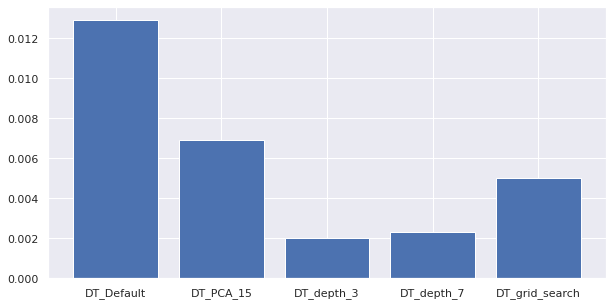

In [426]:
plt.figure(figsize = (10,5))
plt.bar(x = ['DT_Default','DT_PCA_15','DT_depth_3','DT_depth_7','DT_grid_search'],height = dtc_model_time)
plt.show()

**Model Scores comparision between DTs**

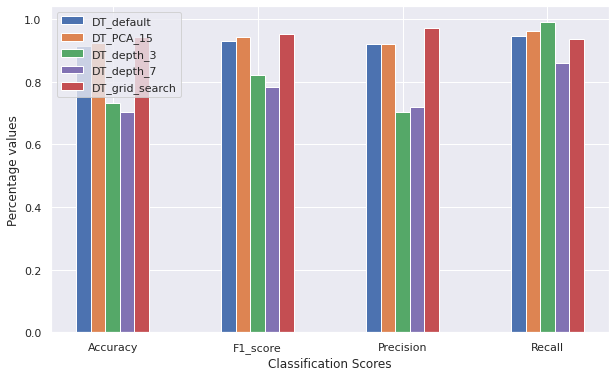

In [427]:
X_labels = ['Accuracy','F1_score', 'Precision','Recall']
X_axis = np.arange(len(X_labels))

plt.figure(figsize =(10,6))
plt.bar(X_axis - 0.2, [model_acc[0],model_f1_score[0],model_pre[0],model_rec[0]], 0.1, label = 'DT_default')
plt.bar(X_axis-0.1 , [model_acc[1],model_f1_score[1],model_pre[1],model_rec[1]], 0.1, label = 'DT_PCA_15')
plt.bar(X_axis, [model_acc[2],model_f1_score[2],model_pre[2],model_rec[2]], 0.1, label = 'DT_depth_3')
plt.bar(X_axis+0.1, [model_acc[3],model_f1_score[3],model_pre[3],model_rec[3]], 0.1, color = 'm', label = 'DT_depth_7')
plt.bar(X_axis+0.2, [model_acc[4],model_f1_score[4],model_pre[4],model_rec[4]], 0.1, color = 'r', label = 'DT_grid_search')

  
plt.xticks(X_axis, X_labels)
plt.xlabel("Classification Scores")
plt.ylabel("Percentage values")
plt.legend()
plt.show()

**Observations from DTs**


*   Clearly the parameters obtained from grid search obtained the most optimal result with less computation time and the best accuracy, f1, precision and relatively less recall score which is to be expected as grid search tests the model against the given parameters and provides the best parameters out of it.
*   Overall we would select the best model out of the Decision Tree Classifier to be one with hyperparameters = (criterion='entropy', max_depth=4, max_features='auto',random_state=21)



# Naive Bayes Classifier

The 3 NB Models we use for the dataset to check performance are
* GaussianNB
* BernoulliNB
* MultinomialNB

In [428]:
#Lists to store model time and accuracy, f1_score, precision and recall for different NB models
nb_model_time = []
nb_model_acc = []
nb_model_f1_score = []
nb_model_pre = []
nb_model_rec = []

**Gaussian NB Classifier**

In [429]:
start = time.time()
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
y_pred_gaussianNB = nb_model.predict(X_test)
run_time = time.time()-start

nb_model_time.append(run_time)
print(run_time,'seconds')

0.0027616024017333984 seconds


In [430]:
print(classification_report(y_test,y_pred_gaussianNB))

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88        64
         1.0       0.93      0.92      0.92       107

    accuracy                           0.91       171
   macro avg       0.90      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



In [431]:
#Storing the classification scores for plotting later
nb_model_acc.append(accuracy_score(y_test,y_pred_gaussianNB))
nb_model_f1_score.append(f1_score(y_test,y_pred_gaussianNB))
nb_model_pre.append(precision_score(y_test,y_pred_gaussianNB))
nb_model_rec.append(recall_score(y_test,y_pred_gaussianNB))

**Bernoulli NB**

In [432]:
start = time.time()
nb_model = BernoulliNB()
nb_model.fit(X_train,y_train)
y_pred_bernoulliNB = nb_model.predict(X_test)
run_time = time.time()-start

nb_model_time.append(run_time)
print(run_time,'seconds')

0.008069276809692383 seconds


In [433]:
print(classification_report(y_test,y_pred_bernoulliNB))

              precision    recall  f1-score   support

         0.0       0.92      0.89      0.90        64
         1.0       0.94      0.95      0.94       107

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



In [434]:
#Storing the classification scores for plotting later
nb_model_acc.append(accuracy_score(y_test,y_pred_bernoulliNB))
nb_model_f1_score.append(f1_score(y_test,y_pred_bernoulliNB))
nb_model_pre.append(precision_score(y_test,y_pred_bernoulliNB))
nb_model_rec.append(recall_score(y_test,y_pred_bernoulliNB))

**Multinomial NB**

*Since multinomial NB does not take negative values and our data is already normalized, we use MinMaxScaler to scale our data from 0 to 1 and fit the multinomialNB model on it*


In [435]:
X_train_copy = X_train
X_test_copy = X_test
scaler = MinMaxScaler()
X_train_copy = scaler.fit_transform(X_train_copy)
X_test_copy = scaler.fit_transform(X_test_copy)

start = time.time()
nb_model = MultinomialNB()
nb_model.fit(X_train_copy,y_train)
y_pred_multinomialNB = nb_model.predict(X_test_copy)
run_time = time.time()-start

nb_model_time.append(run_time)
print(run_time,'seconds')

0.0035851001739501953 seconds


In [436]:
print(classification_report(y_test, y_pred_multinomialNB))

              precision    recall  f1-score   support

         0.0       1.00      0.06      0.12        64
         1.0       0.64      1.00      0.78       107

    accuracy                           0.65       171
   macro avg       0.82      0.53      0.45       171
weighted avg       0.78      0.65      0.53       171



In [437]:
#Storing the classification scores for plotting later
nb_model_acc.append(accuracy_score(y_test,y_pred_multinomialNB))
nb_model_f1_score.append(f1_score(y_test,y_pred_multinomialNB))
nb_model_pre.append(precision_score(y_test,y_pred_multinomialNB))
nb_model_rec.append(recall_score(y_test,y_pred_multinomialNB))

Model time comparision

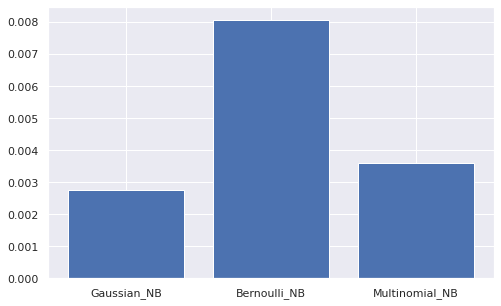

In [438]:
plt.figure(figsize=(8,5))
plt.bar(x = ['Gaussian_NB','Bernoulli_NB','Multinomial_NB'], height = nb_model_time)
plt.show()

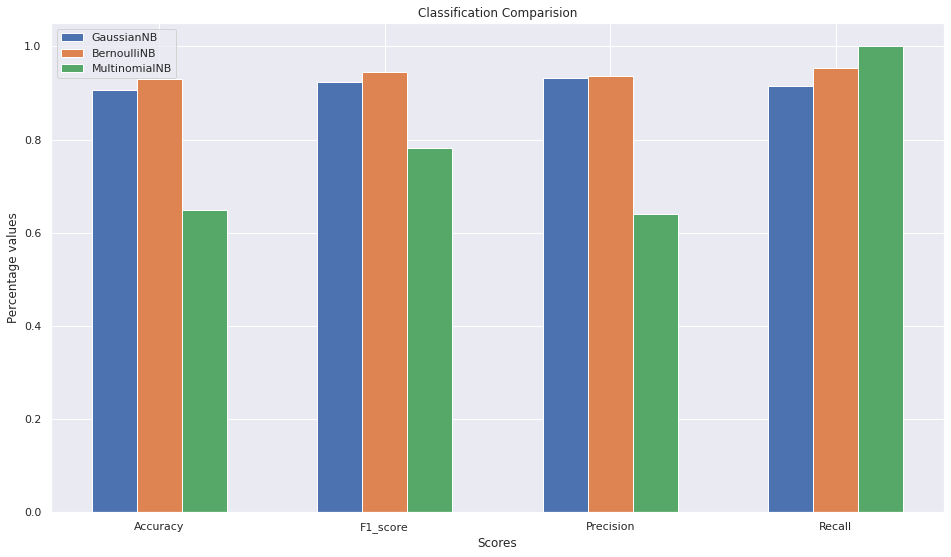

In [439]:
X_labels = ['Accuracy','F1_score', 'Precision','Recall']
X_axis = np.arange(len(X_labels))

plt.figure(figsize =(16,9))
plt.bar(X_axis - 0.2, [nb_model_acc[0],nb_model_f1_score[0],nb_model_pre[0],nb_model_rec[0]], 0.2, label = 'GaussianNB')
plt.bar(X_axis , [nb_model_acc[1],nb_model_f1_score[1],nb_model_pre[1],nb_model_rec[1]], 0.2, label = 'BernoulliNB')
plt.bar(X_axis + 0.2, [nb_model_acc[2],nb_model_f1_score[2],nb_model_pre[2],nb_model_rec[2]], 0.2, label = 'MultinomialNB')
  
plt.xticks(X_axis, X_labels)
plt.xlabel("Scores")
plt.ylabel("Percentage values")
plt.title("Classification Comparision")
plt.legend()
plt.show()

**Observations**


*   Looking at the accuracy scores, we can state that Bernoulli NB performs better than Gaussian NB which assumes the data to be normally distributed which is not the case here Multinomial works better with discrete data.
*   We can see that Bernoulli NB has the highest scores in accuracy, precision, f1-score except recall where Multinomial performs better at the cost of precision. 

*   Although the computation time of Bernoulli is relatively higher, we can consider Bernoulli to be our best model given its computation time is still under 25 milli seconds.







Since GaussianNB is performing only slightly worse than BernoulliNB, we would use grid search on Gaussian NB and tune the available hyperparameters to see if we can achieve anything.

In [440]:
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

In [441]:
# Grid search for Gaussian NB
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
{'var_smoothing': 0.02848035868435802}


In [442]:
print(nbModel_grid.best_estimator_)

GaussianNB(var_smoothing=0.02848035868435802)


Gaussian NB with a var_smoothing = 0.028 was found to be the optimal model. We will train our fit our model to the data and compare again.

In [443]:
nb_grid_model = grid_search.best_estimator_

In [444]:
start = time.time()
nb_grid_model.fit(X_train,y_train)
y_pred_grid_gaussianNB = nb_model.predict(X_test)
run_time = time.time()-start

nb_model_time.append(run_time)
print(run_time,'seconds')

0.004642963409423828 seconds


In [445]:
print(classification_report(y_test,y_pred_grid_gaussianNB))

              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92        64
         1.0       0.93      0.98      0.95       107

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [446]:
#Storing the classification scores for plotting later
nb_model_acc.append(accuracy_score(y_test,y_pred_grid_gaussianNB))
nb_model_f1_score.append(f1_score(y_test,y_pred_grid_gaussianNB))
nb_model_pre.append(precision_score(y_test,y_pred_grid_gaussianNB))
nb_model_rec.append(recall_score(y_test,y_pred_grid_gaussianNB))

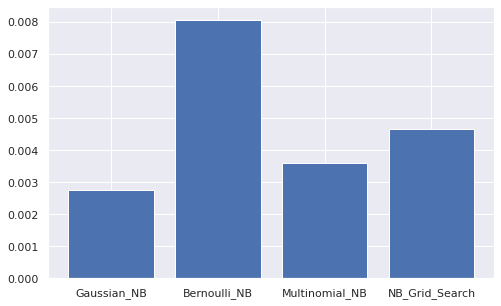

In [447]:
plt.figure(figsize=(8,5))
plt.bar(x = ['Gaussian_NB','Bernoulli_NB','Multinomial_NB','NB_Grid_Search'], height = nb_model_time)
plt.show()

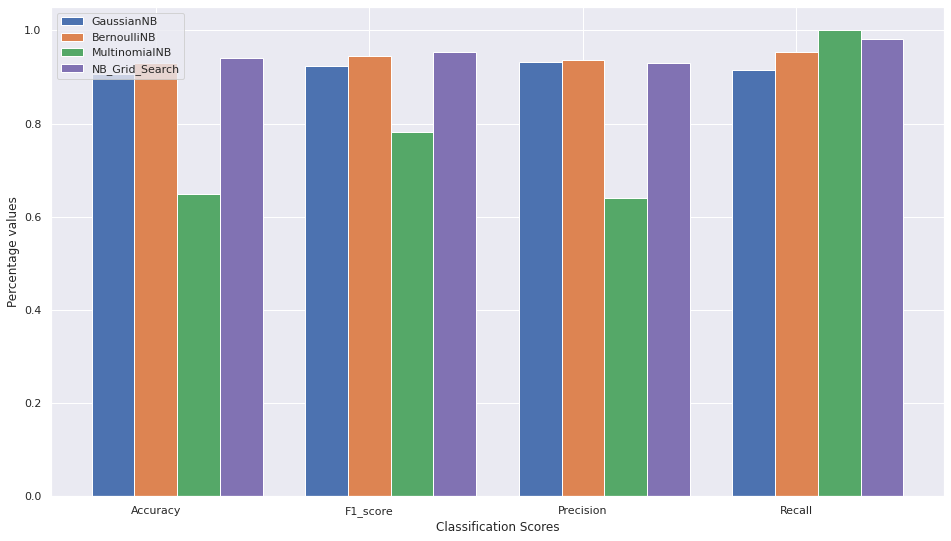

In [448]:
X_labels = ['Accuracy','F1_score', 'Precision','Recall']
X_axis = np.arange(len(X_labels))

plt.figure(figsize =(16,9))
plt.bar(X_axis - 0.2, [nb_model_acc[0],nb_model_f1_score[0],nb_model_pre[0],nb_model_rec[0]], 0.2, label = 'GaussianNB')
plt.bar(X_axis , [nb_model_acc[1],nb_model_f1_score[1],nb_model_pre[1],nb_model_rec[1]], 0.2, label = 'BernoulliNB')
plt.bar(X_axis + 0.2, [nb_model_acc[2],nb_model_f1_score[2],nb_model_pre[2],nb_model_rec[2]], 0.2, label = 'MultinomialNB')
plt.bar(X_axis + 0.4, [nb_model_acc[3],nb_model_f1_score[3],nb_model_pre[3],nb_model_rec[3]], 0.2, color = 'm', label = 'NB_Grid_Search')
  
plt.xticks(X_axis, X_labels)
plt.xlabel("Classification Scores")
plt.ylabel("Percentage values")
plt.legend()
plt.show()

*We can see that now our grid search model which is Gaussian NB with changed var smoothing value outperforms the BernoulliNb which was the best among all three models. However the computation time almost doubled. But given we are predicting for cancer, we can still give accuracy higher importance than computation time and select Grid Search model as out best model among NB algorithms*

# SVM (SVC)

In [449]:
#Time the model
svm_model_time = []
svm_model_acc = []
svm_model_f1_score = []
svm_model_pre = []
svm_model_rec = []

In [450]:
#Training with hyperparameters degree: 2, kernel: sigmoid, gamma: scale
start = time.time()
svm_model = SVC(degree = 2, kernel = 'sigmoid',gamma = 'scale' )
svm_model = svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
run_time = time.time() - start
svm_model_time.append(run_time)
print(run_time, 'seconds')

0.017297744750976562 seconds


In [451]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91        64
         1.0       0.93      0.97      0.95       107

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



In [452]:
#Storing the classification scores for plotting later
svm_model_acc.append(accuracy_score(y_test,y_pred_svm))
svm_model_f1_score.append(f1_score(y_test,y_pred_svm))
svm_model_pre.append(precision_score(y_test,y_pred_svm))
svm_model_rec.append(recall_score(y_test,y_pred_svm))

We can see the accuracy is 94% but we will tune the hyperparameters a little more and compare

In [453]:
#Training with hyperparameters degree: 3, kernel: sigmoid, gamma: auto
start = time.time()
svm_model = SVC(degree = 3, kernel = 'sigmoid',gamma = 'auto' )
svm_model = svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
run_time = time.time() - start
svm_model_time.append(run_time)
print(run_time, 'seconds')

0.005564689636230469 seconds


In [454]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94        64
         1.0       0.95      0.99      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [455]:
#Storing the classification scores for plotting later
svm_model_acc.append(accuracy_score(y_test,y_pred_svm))
svm_model_f1_score.append(f1_score(y_test,y_pred_svm))
svm_model_pre.append(precision_score(y_test,y_pred_svm))
svm_model_rec.append(recall_score(y_test,y_pred_svm))

*We see the model slighltly improve in accuracy setting the gamma to be auto and degree set to 3*

*As the data performed well on logistic regression, data might be linearly separable. Hence we will try using the linear and rbf kernel and see what works best*

In [456]:
#Training with hyperparameters degree: 3, kernel: rbf, gamma: auto
start = time.time()
svm_model = SVC(degree = 3, kernel = 'rbf',gamma = 'auto' )
svm_model = svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
run_time = time.time() - start
svm_model_time.append(run_time)
print(run_time, 'seconds')

0.009794950485229492 seconds


In [457]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98        64
         1.0       0.98      0.99      0.99       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



*RBF really worked well on the data with 98% accuracy overall and high precision and recall which is comparable to our Logistic Regression model*

In [458]:
#Storing the classification scores for plotting later
svm_model_acc.append(accuracy_score(y_test,y_pred_svm))
svm_model_f1_score.append(f1_score(y_test,y_pred_svm))
svm_model_pre.append(precision_score(y_test,y_pred_svm))
svm_model_rec.append(recall_score(y_test,y_pred_svm))

In [459]:
#Training with hyperparameters degree: 3, kernel: linear, gamma: auto
start = time.time()
svm_model = SVC(degree = 3, kernel = 'linear',gamma = 'auto' )
svm_model = svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
run_time = time.time() - start
svm_model_time.append(run_time)
print(run_time, 'seconds')

0.0033872127532958984 seconds


In [460]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        64
         1.0       0.98      1.00      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



In [461]:
#Storing the classification scores for plotting later
svm_model_acc.append(accuracy_score(y_test,y_pred_svm))
svm_model_f1_score.append(f1_score(y_test,y_pred_svm))
svm_model_pre.append(precision_score(y_test,y_pred_svm))
svm_model_rec.append(recall_score(y_test,y_pred_svm))

We can see that linear kernel outperforms our baseline model and achieves the best possible result with high precision and recall values on the test dataset. Hence linear kernel with degree = 3 and gamma = 'auto' seems like our best model. We will now move on to try grid search CV using SVM to see if we can achieve any better results.

We can see that the SVM performed well on the testing data set and for the first time, we see a model that has comparable performance to our baseline model of Logistic Regression which had the 98% accuracy with approx. the same precision and recall values.


**SVM using Grid Search CV**

In [462]:
svm_model = SVC()
parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': [1, 2, 3, 4, 5],
              'gamma': ['scale', 'auto']}

In [463]:
svm_grid_search = GridSearchCV(svm_model , param_grid=parameters)
svm_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'degree': [1, 2, 3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [464]:
svm_grid_search.best_params_

{'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}

According to grid search the best model turns out to be one with gamma = scale , kernel = rbf and degree = 1 

In [465]:
start = time.time()
svm_model = svm_grid_search.best_estimator_
svm_model = svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
run_time = time.time() - start
svm_model_time.append(run_time)
print(run_time, 'seconds')

0.009643316268920898 seconds


In [466]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97        64
         1.0       0.97      0.99      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [467]:
#Storing the classification scores for plotting later
svm_model_acc.append(accuracy_score(y_test,y_pred_svm))
svm_model_f1_score.append(f1_score(y_test,y_pred_svm))
svm_model_pre.append(precision_score(y_test,y_pred_svm))
svm_model_rec.append(recall_score(y_test,y_pred_svm))

The grid search model has an accuracy of 98% and slightly lesser precision, recall and f1_score. We will plot the model time and classification scores to make suitable conclusions

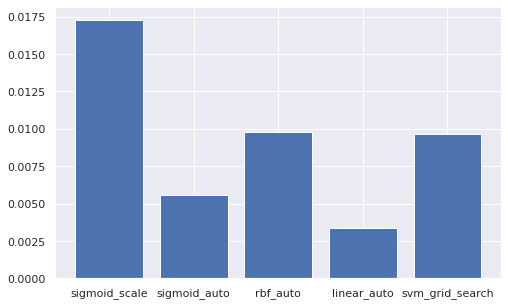

In [468]:
plt.figure(figsize=(8,5))
plt.bar(x = ['sigmoid_scale','sigmoid_auto','rbf_auto','linear_auto','svm_grid_search'], height = svm_model_time)
plt.show()

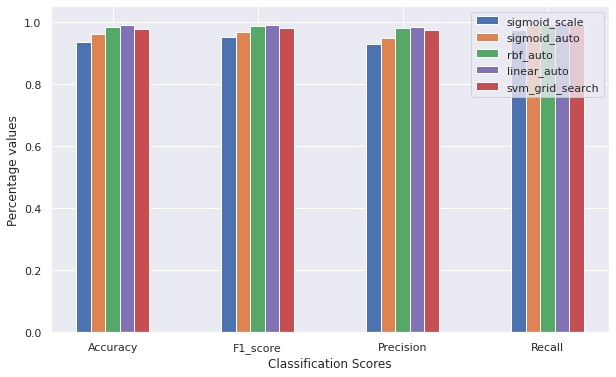

In [469]:
X_labels = ['Accuracy','F1_score', 'Precision','Recall']
X_axis = np.arange(len(X_labels))

plt.figure(figsize =(10,6))
plt.bar(X_axis - 0.2, [svm_model_acc[0],svm_model_f1_score[0],svm_model_pre[0],svm_model_rec[0]], 0.1, label = 'sigmoid_scale')
plt.bar(X_axis-0.1 , [svm_model_acc[1],svm_model_f1_score[1],svm_model_pre[1],svm_model_rec[1]], 0.1, label = 'sigmoid_auto')
plt.bar(X_axis, [svm_model_acc[2],svm_model_f1_score[2],svm_model_pre[2],svm_model_rec[2]], 0.1, label = 'rbf_auto')
plt.bar(X_axis+0.1, [svm_model_acc[3],svm_model_f1_score[3],svm_model_pre[3],svm_model_rec[3]], 0.1, color = 'm', label = 'linear_auto')
plt.bar(X_axis+0.2, [svm_model_acc[4],svm_model_f1_score[4],svm_model_pre[4],svm_model_rec[4]], 0.1, color = 'r', label = 'svm_grid_search')

  
plt.xticks(X_axis, X_labels)
plt.xlabel("Classification Scores")
plt.ylabel("Percentage values")
plt.legend()
plt.show()

**Since we need to select the model with best recall score with fastest prediction time, we would select the svm model with gamma = auto and linear kernel as it has recall score of 99%**

*The following models would be compared*


*   Logistic Regression with default parameters (baseline model)
*   Decision Tree Grid Search model
*   GaussianNB Grid Search Model
*   SVM with kernel = linear and gamma = auto







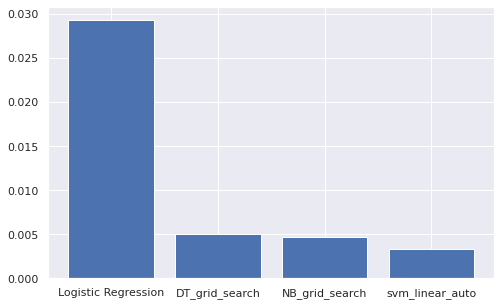

In [470]:
plt.figure(figsize=(8,5))
plt.bar(x = ['Logistic Regression','DT_grid_search','NB_grid_search','svm_linear_auto'], height = [lr_model_time[0], dtc_model_time[4],nb_model_time[3],svm_model_time[3]])
plt.show()

*So logistic regression takes too much time compared to other models and hence would whereas DT_grid_search has the least model training and prediction time while NB_grid_search and svm_linear_auto have almost comparable time*

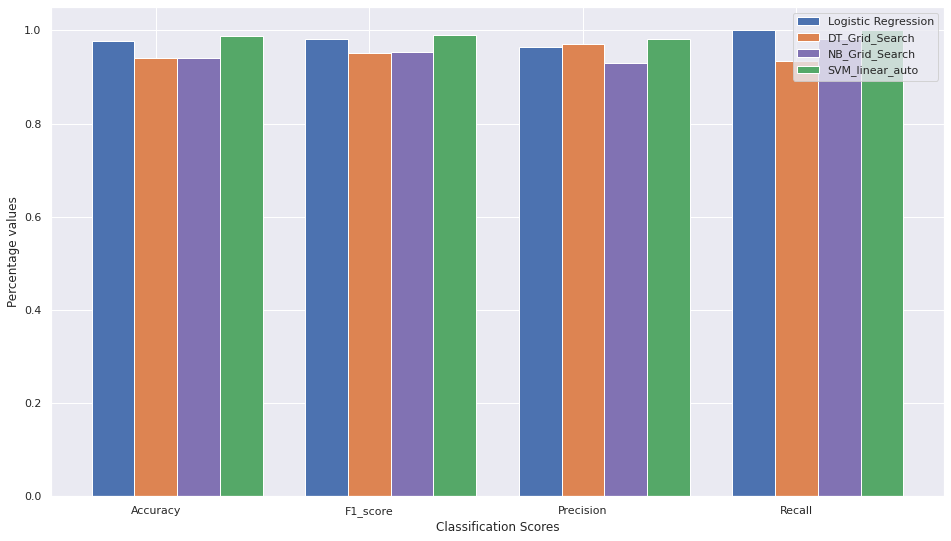

In [471]:
X_labels = ['Accuracy','F1_score', 'Precision','Recall']
X_axis = np.arange(len(X_labels))

plt.figure(figsize =(16,9))
plt.bar(X_axis - 0.2, [lr_model_acc[0],lr_model_f1_score[0],lr_model_pre[0],lr_model_rec[0]], 0.2, label = 'Logistic Regression')
plt.bar(X_axis , [model_acc[4],model_f1_score[4],model_pre[4],model_rec[4]], 0.2, label = 'DT_Grid_Search')
plt.bar(X_axis + 0.2, [nb_model_acc[3],nb_model_f1_score[3],nb_model_pre[3],nb_model_rec[3]], 0.2, color = 'm', label = 'NB_Grid_Search')
plt.bar(X_axis + 0.4, [svm_model_acc[3],svm_model_f1_score[3],svm_model_pre[3],svm_model_rec[3]], 0.2, label = 'SVM_linear_auto')
  
plt.xticks(X_axis, X_labels)
plt.xlabel("Classification Scores")
plt.ylabel("Percentage values")
plt.legend()
plt.show()

All the models have reasonably good accuracy and precision however, as we need to select the model with best recall score, we would be indifferent between logistic regression and SVM. However since computation time of Logistic Regression is way higher compared to SVM, we would select SVM classifier as our final model and plot the confusion matrix for the same.

# Training the final selected model and plotting the confusion matrix

In [472]:
svm_model = SVC(degree = 3, kernel = 'linear',gamma = 'auto' )
svm_model = svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [473]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        64
         1.0       0.98      1.00      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



In [474]:
# Defining the function to plot confusion matrix
from sklearn import metrics
def cf_display_func(y_test,y_pred):
    cm = metrics.confusion_matrix(y_test, y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels = ['0', '1'])
    fig, axis = plt.subplots(figsize =(6,6))
    axis.grid(False)
    cm_display.plot(ax = axis)

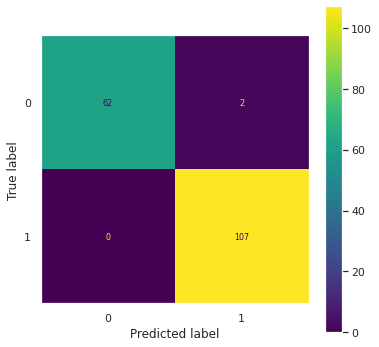

In [475]:
cf_display_func(y_test, y_pred_svm)